## Decision Tree and Ensemble Model

## Outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd
import random
random.seed(42)

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'],axis=1, inplace=True)

In [3]:
dataset.shape

(30001, 24)

In [4]:
dataset.drop(0,axis=0, inplace=True)

In the following, you can take a look into the dataset.

In [5]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
dataset.rename(columns={'default payment next month':"Default"},inplace=True)
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Default      30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [8]:
dataset=dataset.astype('int')

In [9]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Transformation pipelines**

In [10]:
column_stat=['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']
column_pay=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
column_bill=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
column_amt=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


# Grouping the categorical and discrete features
column_default=['Default']
categorical_vars=['SEX','EDUCATION','MARRIAGE']+column_pay
discrete_vars=['LIMIT_BAL']+column_bill+column_amt

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

To transform the features, OneHotEncoder is used for categorical data and MinMaxScaler is used for descrete data.

In [12]:
# Categorical -  one hot encode
cat_pipe = Pipeline([('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical -  scale
num_pipe = Pipeline([ ('scl', MinMaxScaler())])
num_transformers = [('num', num_pipe, discrete_vars)]

In [13]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)

X = ct.fit_transform(dataset[categorical_vars + discrete_vars])
y = dataset.Default

## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

**Spliting the data**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(dataset.shape)
print(X.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30000, 24)
(30000, 90)
(24000, 90) (6000, 90) (24000,) (6000,)


**Training Decision Tree Classifier**

In [15]:
from sklearn.tree import DecisionTreeClassifier
import time

time_start = time.time()

tree_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree_clf.fit(X_train,y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 0.3987705707550049 seconds


In [16]:
list(zip(dataset.columns, tree_clf.feature_importances_))

[('LIMIT_BAL', 0.0),
 ('SEX', 0.0),
 ('EDUCATION', 0.0),
 ('MARRIAGE', 0.0),
 ('AGE', 0.0),
 ('PAY_0', 0.0),
 ('PAY_2', 0.0),
 ('PAY_3', 0.0027136028871097904),
 ('PAY_4', 0.0),
 ('PAY_5', 0.0),
 ('PAY_6', 0.0),
 ('BILL_AMT1', 0.0),
 ('BILL_AMT2', 0.0),
 ('BILL_AMT3', 0.0),
 ('BILL_AMT4', 0.0),
 ('BILL_AMT5', 0.0),
 ('BILL_AMT6', 0.0),
 ('PAY_AMT1', 0.537648561930486),
 ('PAY_AMT2', 0.02164989808789486),
 ('PAY_AMT3', 0.0),
 ('PAY_AMT4', 0.0),
 ('PAY_AMT5', 0.0),
 ('PAY_AMT6', 0.0),
 ('Default', 0.0)]

It seems the main important features in predicting the payment default are payment amount 1 and 2.

test accuracy for Decision Tree classifier: 82.4 %


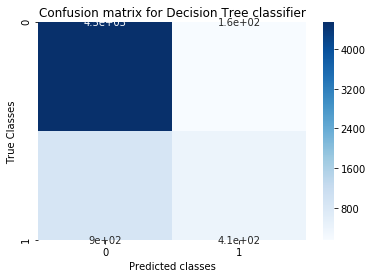

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_hat_tree = tree_clf.predict(X_test)

print('test accuracy for Decision Tree classifier:'\
      , round(accuracy_score(y_test, y_hat_tree)*100, 2), '%')

plt.title('Confusion matrix for Decision Tree classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_tree),annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [18]:
depth=[2,4,8]
leaf=[50,100,400]
impurity=[0.01,0.05,0.1]

print('Test accuracy for Decision Tree classifier:')

for i in depth:
    for j in leaf:
        for k in impurity:
            tree_clf = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j,min_impurity_decrease=k,criterion='entropy')
            tree_clf.fit(X_train,y_train)
            y_hat_tree = tree_clf.predict(X_test)

            print('with max_depth = {}, min_samples_leaf = {},and min_impurity_decrease={}:'.format(i,j,k)
          , round(accuracy_score(y_test, y_hat_tree)*100, 2), '%')


Test accuracy for Decision Tree classifier:
with max_depth = 2, min_samples_leaf = 50,and min_impurity_decrease=0.01: 81.92 %
with max_depth = 2, min_samples_leaf = 50,and min_impurity_decrease=0.05: 81.92 %
with max_depth = 2, min_samples_leaf = 50,and min_impurity_decrease=0.1: 78.25 %
with max_depth = 2, min_samples_leaf = 100,and min_impurity_decrease=0.01: 81.92 %
with max_depth = 2, min_samples_leaf = 100,and min_impurity_decrease=0.05: 81.92 %
with max_depth = 2, min_samples_leaf = 100,and min_impurity_decrease=0.1: 78.25 %
with max_depth = 2, min_samples_leaf = 400,and min_impurity_decrease=0.01: 81.92 %
with max_depth = 2, min_samples_leaf = 400,and min_impurity_decrease=0.05: 81.92 %
with max_depth = 2, min_samples_leaf = 400,and min_impurity_decrease=0.1: 78.25 %
with max_depth = 4, min_samples_leaf = 50,and min_impurity_decrease=0.01: 81.92 %
with max_depth = 4, min_samples_leaf = 50,and min_impurity_decrease=0.05: 81.92 %
with max_depth = 4, min_samples_leaf = 50,and min_i

**Discussion**

Trying different values for max_depth, min_samples_leaf,and min_impurity_decrease shows that:
- Changing the max_depth from 2 to 8 does not affect the test accuracy
- Changing the min_samples_leaf from 50 to 400 also does not change the test accuracy
- Minimum impurity decrease 0.01 and 0.05 gives the same result and increasing it to 0.1, lowers the test accuracy.

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomGrid search over hyper-parameters. Compare the results.

**Hyperparameter Random Grid Search**

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth':[2,4,8,12,20],
              'min_samples_leaf':[5,10,50,100,400],
              'min_impurity_decrease':[0.001,0.01,0.02,0.05,0.1],
              'criterion':['gini','entropy']}

tree_clf = DecisionTreeClassifier()

time_start = time.time()

random_search = RandomizedSearchCV(estimator=tree_clf, 
                           param_distributions=param_dist,
                           n_iter=50,                     
                           scoring='roc_auc',
                           cv=5)

random_search.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 46.427372217178345 seconds


In [20]:
print(random_search.best_params_)
print("\n",random_search.best_estimator_)

{'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_depth': 20, 'criterion': 'entropy'}

 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [21]:
tree_clf=DecisionTreeClassifier(max_depth= random_search.best_params_['max_depth'],
                                min_impurity_decrease= random_search.best_params_['min_impurity_decrease'],
                                min_samples_leaf= random_search.best_params_['min_samples_leaf'],
                                criterion=random_search.best_params_['criterion'])
time_start = time.time()

tree_clf.fit(X_train,y_train)
y_hat_tree = tree_clf.predict(X_test)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('Test accuracy for Decision Tree classifier, using best parameters from random search:',
      round(accuracy_score(y_test, y_hat_tree)*100, 2), '%')


Time elapsed: 0.506730318069458 seconds
Test accuracy for Decision Tree classifier, using best parameters from random search: 82.4 %


**Discussion**

Different ranges of four hyperparameters (max_depth, min_samples_leaf, min_impurity_decrease, and criterion) were used for the random search and best parameters in those ranges were chosen:
- max_depth= 20, 
- min_impurity_decrease= 0.001, 
- min_samples_leaf= 5, and 
- criterion='entropy'

These best parameters give the test accuracy of 82.4% which is better than 81.92% and 78.25% we got from the previous section when we tried different hyperparameters but it is the same as the decision tree in Q1 (probably by chance). With random grid search we covered a wider range for the parameters.  

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


**Defining function for plotting learning curve**

In [22]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model, X, y,lapse):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train),lapse):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    x_axis=[lapse * i for i in list(range(0,len(train_errors)))]
    plt.plot(x_axis,np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(x_axis,np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

#### 1) Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

time_start = time.time()
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,criterion='entropy')
RF_clf.fit(X_train,y_train)

t_RF_clf=time.time()-time_start
print('Time elapsed: {} seconds'.format(t_RF_clf))

for feature, importance in zip(dataset.columns, RF_clf.feature_importances_):
    if importance>0.01:
        print(feature,':',importance)

Time elapsed: 1.231290340423584 seconds
BILL_AMT5 : 0.11614269231258696
BILL_AMT6 : 0.012922328996429883
PAY_AMT1 : 0.1676095145963773
PAY_AMT2 : 0.01776431995803329


In [24]:
y_hat_clf = RF_clf.predict(X_test)

print('Test accuracy for Random Forest classifier:{:.2f}%'.format(accuracy_score(y_test, y_hat_tree)*100))

Test accuracy for Random Forest classifier:82.40%


Random Forest Classifier


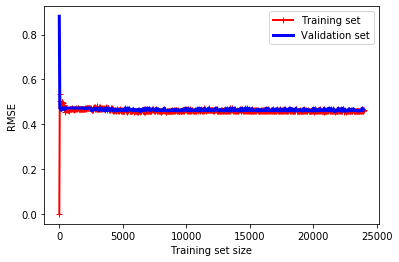

In [25]:
l=int(len(X)/900*t_RF_clf) # do the calculation for every l sample to keep the running time 900 sec
print('Random Forest Classifier')
plot_learning_curves(RF_clf, X, y,l)

#### 2) AdaBoost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,
                            algorithm="SAMME.R", learning_rate=0.5)

time_start = time.time()
ada_clf.fit(X_train,y_train)

t_ada_clf=time.time()-time_start
print('Time elapsed: {} seconds'.format(t_ada_clf))

for feature, importance in zip(dataset.columns, ada_clf.feature_importances_):
    if importance>0.01:
        print(feature,':',importance)

Time elapsed: 14.048941850662231 seconds
BILL_AMT5 : 0.011179485186526582
PAY_AMT1 : 0.016699621638384267


In [27]:
y_hat_clf = ada_clf.predict(X_test)

print('Test accuracy for AdaBoost classifier:{:.2f}%'.format(accuracy_score(y_test, y_hat_tree)*100))

Test accuracy for AdaBoost classifier:82.40%


AdaBoost Classifier


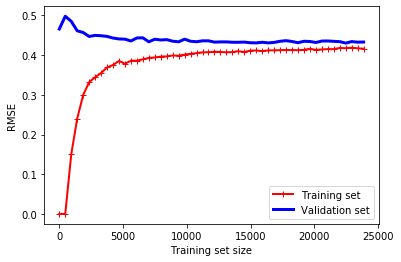

In [28]:
l=int(len(X)/900*t_ada_clf) # do the calculation for every l sample to keep the running time 900 sec
print('AdaBoost Classifier')
plot_learning_curves(ada_clf, X, y,l)

#### 3) Extra Trees Classifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=100)    

time_start = time.time()
ext_clf.fit(X_train,y_train)

t_ext_clf=time.time()-time_start

print('Time elapsed: {} seconds'.format(t_ext_clf))

for feature, importance in zip(dataset.columns, ext_clf.feature_importances_):
    if importance>0.01:
        print(feature,':',importance)

Time elapsed: 5.914607286453247 seconds
SEX : 0.010011821882311669
MARRIAGE : 0.01008817261150792
AGE : 0.011344187280898
PAY_6 : 0.010887279509693856
BILL_AMT1 : 0.010823119776460227
BILL_AMT5 : 0.017080756098752283
PAY_AMT1 : 0.05523484238231217


In [30]:
y_hat_clf = ext_clf.predict(X_test)

print('Test accuracy for Extra Trees classifier:{:.2f}%'.format(accuracy_score(y_test, y_hat_tree)*100))

Test accuracy for Extra Trees classifier:82.40%


Extra Trees Classifier


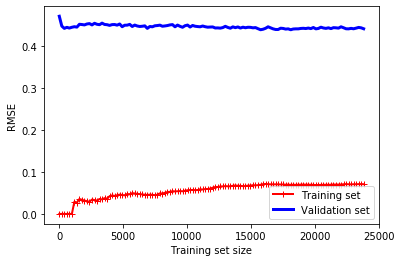

In [31]:
l=int(len(X)/900*t_ext_clf) # do the calculation for every l sample to keep the running time 900 sec
print('Extra Trees Classifier')
plot_learning_curves(ext_clf, X, y,l)

#### 4) Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(n_estimators=100)
                             
time_start = time.time()
GB_clf.fit(X_train,y_train)

t_GB_clf=time.time()-time_start
print('Time elapsed: {} seconds'.format(t_GB_clf))

for feature, importance in zip(dataset.columns, GB_clf.feature_importances_):
    if importance>0.01:
        print(feature,':',importance)

Time elapsed: 12.371904134750366 seconds
PAY_AMT1 : 0.44317388660068063
PAY_AMT2 : 0.021728814701224498


In [33]:
y_hat_clf = GB_clf.predict(X_test)

print('Test accuracy for Gradient Boosted Trees classifier:{:.2f}%'.format(accuracy_score(y_test, y_hat_tree)*100))

Test accuracy for Gradient Boosted Trees classifier:82.40%


#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

**1) How does changing hyperparms effect model performance?**

By trying a range for the selected hyperparameters the test accuracy changed in the range of 78.25% to 81.92%. This is not a significant change and comparing to the test accuracy of decision tree (82.4%) it seems that the model performance is not affected much by the selected hyperparamters.

    max_depth: [2,4,8,12,20] => best : 20
    min_samples_leaf: [5,10,50,100,400] => best: 5
    min_impurity_decrease: [0.001,0.01,0.02,0.05,0.1] =>  best = 0.001
    criterion: ['gini','entropy'] => best: entropy
    
 
These best parameters give the test accuracy of 82.4% which is slightly better than 81.92% and 78.25% we got from the previous section. 

When the best parameters are the minimum or maximum of the range, we can try smaller and larger values for that parameter to see if the performance changes or not. 



**2) Why do you think certain models performed better/worse?**

The test accuracy of all the models is the same (82.4%) but their running time is different and they select different features with different coefficients as the important features.

It was expected that the Extra tree be the fastest model but random forest was the fastest. 

Extra Tree selected more features as important features. This can be due to the fact that Extra Tree is more random  by using random thresholds for each feature rather than searching for the best possible thresholds selection of the features (like regular Decision Trees do) or considering a random subset of features at each node for splitting (like a Random Forest). Also by looking at the learning curve, it seems that the extra tree is overfitting the training set. 


AdaBoost and Gradient Boosted trees both take much longer to train the training set. Also, by looking at the learning curve for Adaboost, it can be seen that it needs a larger training set compared to Random Forest to perform well on both training and validation sets.    

A summary of the models output is as follows:


**2-1) Random Forest Classifier:**

   Time elapsed: 1.23 seconds
   
   Test accuracy for Random Forest classifier:82.40%

   *Feature importance:*
   
    PAY_AMT1 : 0.1676
    BILL_AMT5 : 0.116
    PAY_AMT2 : 0.018
    BILL_AMT6 : 0.013
    
   learning curver converts quickly less than 1000 training set size


**2-2)AdaBoost classifier:**

   Time elapsed: 14.05 seconds
   
   Test accuracy for AdaBoost classifier:82.40%

   *Feature importance:*
    
    PAY_AMT1 : 0.0166
    BILL_AMT5 : 0.011  
    

**2-3) Extra Trees classifier:**
    
   Time elapsed: 5.91 seconds
   
   Test accuracy for Extra Trees classifier:82.40%

   *Feature importance:*
    
    PAY_AMT1 : 0.055
    BILL_AMT5 : 0.017
    AGE : 0.011
    PAY_6 : 0.011
    BILL_AMT1 : 0.011
    SEX : 0.010
    MARRIAGE : 0.010
 

**2-4) Gradient Boosted Trees:**

   Time elapsed: 12.37 seconds    
   
   Test accuracy for Gradient Boosted Trees classifier:82.40%
    
   *Feature importance:*
    
    PAY_AMT1 : 0.443
    PAY_AMT2 : 0.022


**3) How does this performance line up with known strengths/weakness of these models?**

As was expected, boosting method takes longer to train the dataset. 
All models give similar test accuracy. 
Due to more randomness of the extra tree method on choosing the features, more best features are selected by extra tree method but the learning curve of the extra tree shows that it does not have a good performance on both traning and validation sets and it seems it is overfitting the training set.   

*Random Forest Classifier:*
    Time elapsed: 1.23129 seconds

*AdaBoost classifier:*
    Time elapsed: 14.04894 seconds

*Extra Trees classifier:*
    Time elapsed: 5.91461 seconds

*Gradient Boosted Trees:*
    Time elapsed: 12.37190 seconds
